# CAR PRICE PREDICTION

Link Dataset: https://www.kaggle.com/datasets/lainguyn123/australia-car-market-data

# Background

> Pasar mobil di Australia merupakan salah satu industri yang berkembang pesat, di mana harga mobil dipengaruhi oleh berbagai faktor seperti merek, tahun pembuatan, kilometer tempuh, jenis bahan bakar, dan kapasitas mesin. Para dealer mobil, pabrikan, dan konsumen semakin mengandalkan data untuk memahami tren harga dan membuat keputusan pembelian yang lebih terinformasi. Dalam lingkungan yang kompetitif ini, memahami dinamika penetapan harga berdasarkan faktor-faktor tersebut sangat penting untuk dapat bertahan di pasar dan memaksimalkan keuntungan. Selain itu, konsumen juga dihadapkan pada banyak pilihan, sehingga membutuhkan informasi yang akurat untuk menentukan harga wajar dari sebuah mobil.

> Analisis prediktif menggunakan data historis dan karakteristik mobil menjadi solusi yang tepat untuk memahami tren harga ini. Dengan memanfaatkan machine learning, kita dapat mengidentifikasi pola dan tren utama dalam harga kendaraan, serta memberikan perkiraan harga berdasarkan atribut spesifik.

# Problem Statement

> Pasar mobil di Australia dipengaruhi oleh banyak variabel seperti merek, tahun pembuatan, kilometer tempuh, kapasitas mesin, dan jenis bahan bakar. Banyaknya faktor ini membuat konsumen dan dealer mobil kesulitan untuk menentukan harga yang wajar dan optimal. Oleh karena itu, diperlukan model prediksi yang dapat mengestimasi harga mobil berdasarkan atribut-atribut tersebut. Model ini akan memberikan informasi yang membantu konsumen dalam mendapatkan harga terbaik dan dealer mobil untuk mengoptimalkan harga jual, serta mengurangi risiko overpricing atau underpricing yang dapat mempengaruhi penjualan.

# Objective

- Specific: Mengembangkan model prediksi yang dapat memperkirakan harga mobil di pasar Australia berdasarkan fitur-fitur spesifik seperti merek, tahun pembuatan, kilometer tempuh, kapasitas mesin, dan jenis bahan bakar.

- Measurable: Mengukur keberhasilan model dengan mencapai akurasi prediksi harga mobil setidaknya 85% menggunakan metrik evaluasi seperti Mean Absolute Error (MAE) dan R-squared (R²).

- Achievable: Mengumpulkan dan membersihkan dataset berisi minimal 10.000 data mobil dari berbagai merek dan model di Australia, serta menggunakan teknik machine learning seperti regresi linear untuk membangun model prediktif.

- Relevant: Tujuan ini relevan dengan kebutuhan pasar, karena model ini akan membantu dealer mobil menetapkan harga yang kompetitif dan membantu konsumen dalam membuat keputusan pembelian yang lebih tepat.

- Time-bound: Model prediksi akan selesai dalam waktu 3 bulan, dengan tahap pengumpulan data dan eksplorasi dalam 1 bulan, pembangunan dan pengujian model dalam 1,5 bulan, dan penyusunan laporan serta rekomendasi dalam 0,5 bulan.



# Import Libraries

In [1]:
# Libraries for Data Handling
import pandas as pd

# Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for Correlation Analysis
from scipy.stats import spearmanr, pearsonr
from scipy.stats import kendalltau
from feature_engine.outliers import Winsorizer

# Libraries for Data Preprocessing and Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Libraries for Decision Tree and Ensemble Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Libraries for Hyperparameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV

# Libraries for model saving
import pickle


# Data Loading

## Data Dictionary

| **Column Name**       | **Description**            |
|-----------------------|----------------------------|
| `ID`                  | Car Code                   |
| `Name`                | Car Name                   |
| `Price`               | Car Price                  |
| `Brand`               | Car Brand                  |
| `Model`               | Car Model Year             |
| `Variant`             | Car Variant                |
| `Series`              | Car Series                 |
| `Year`                | Year of Manufacture        |
| `Gearbox`             | Gearbox Type               |
| `Type`                | Body Design                |
| `Fuel`                | Fuel Type                  |
| `Status`              | Car Condition              |
| `Kilometers`          | Mileage                    |
| `CC`                  | Engine Capacity (cc)       |
| `Color`               | Car Color                  |
| `Seating Capacity`    | Seating Capacity           |


## Menampilkan dataset

In [2]:
# Load dataset
df = pd.read_csv('cars_info.csv')
df

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,12852453,2003 Holden Commodore Executive VY,4499,Holden,Commodore,Executive,VY,2003,230441,Sedan,Automatic,Unleaded Petrol,Used,3791,Gold,5
17044,12852460,2008 Toyota Yaris YR NCP90R,4999,Toyota,Yaris,YR,NCP90R,2008,237113,Hatchback,Manual,Unleaded Petrol,Used,1299,Yellow,5
17045,12852462,2002 Holden Jackaroo SE LWB (4X4) U8,7999,Holden,Jackaroo,SE LWB (4X4),U8,2002,238768,Wagon,Automatic,Diesel,Used,2999,Gold,7
17046,12852463,2016 Hyundai I30 Active GD4 Series 2,14000,Hyundai,I30,Active,GD4 Series 2,2016,49800,Hatchback,Manual,Unleaded Petrol,Used,1797,Blue,5


In [3]:
df.Name

0                        2010 Toyota Rukus Build 2 AZE151R
1        2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...
2        2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...
3               2010 Mercedes-Benz E250 CDI Avantgarde 207
4                             2016 Holden Cruze CD JH MY16
                               ...                        
17043                   2003 Holden Commodore Executive VY
17044                          2008 Toyota Yaris YR NCP90R
17045                 2002 Holden Jackaroo SE LWB (4X4) U8
17046                 2016 Hyundai I30 Active GD4 Series 2
17047                2005 Toyota RAV4 Cruiser (4X4) ACA23R
Name: Name, Length: 17048, dtype: object

## Check Data Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


- Jumlah Baris: DataFrame memiliki total 17.048 baris.
- Jumlah Kolom: DataFrame terdiri dari 16 kolom.
- Nama Kolom: Setiap kolom memiliki nama yang mewakili atribut mobil, seperti ID, Name, Price, Brand, dll.
- Tipe Data:
6 kolom berisi data numerik (int64), seperti Price, Year, Kilometers.
10 kolom berisi data teks (object), seperti Brand, Model, Color.
- Non-Null Count: Tidak ada nilai kosong di seluruh kolom, setiap kolom memiliki 17.048 non-null entries.

## Check Duplicate data

In [7]:
df.duplicated().sum()

0

tidak ada data yang duplicate

# Conceptual Problems

## Jelaskan latar belakang adanya bagging dan cara kerja bagging !

> Bagging dikembangkan untuk mengurangi varian model dan mencegah overfitting. Dengan membuat beberapa model dari sampel data yang berbeda, Bagging menggabungkan prediksi dari model-model tersebut untuk meningkatkan akurasi dan stabilitas. Tujuan utamanya adalah untuk mengurangi ketergantungan pada satu model yang mungkin terlalu sensitif terhadap data latih.

> Bagging bekerja dengan membuat beberapa model dari sampel data yang berbeda. Mula-mula, data latih diambil secara acak dengan penggantian untuk membuat beberapa subset. Lalu, model yang sama dilatih pada setiap subset tersebut. Setelah semua model dilatih, prediksi dari setiap model digabungkan. Untuk klasifikasi, prediksi diambil berdasarkan suara mayoritas, sementara untuk regresi, rata-rata dari hasil prediksi yang digunakan. Hasil penggabungan ini membantu mengurangi kesalahan dan meningkatkan akurasi prediksi keseluruhan.

## Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

> `Random Forest`: Menggunakan pendekatan Bagging, yaitu membangun banyak pohon keputusan secara independen dari subset data dan fitur yang berbeda. Hasil akhirnya adalah penggabungan prediksi dari semua pohon.

> `Boosting`: Memperbaiki prediksi secara bertahap dengan membangun model secara berurutan, di mana setiap model baru berfokus pada memperbaiki kesalahan dari model sebelumnya. Boosting lebih agresif dalam meningkatkan akurasi, tapi berpotensi menyebabkan overfitting jika tidak dikendalikan dengan baik.



## Jelaskan apa yang dimaksud dengan Cross Validation !

> Cross Validation adalah teknik evaluasi model yang digunakan untuk mengukur seberapa baik model akan bekerja pada data yang belum pernah dilihat. Teknik ini digunakan untuk menghindari overfitting atau underfitting, dan memberikan gambaran lebih akurat tentang performa model.

# Exploratory Data Analysis (EDA)

## Drop Column yang tidak dibutuhkan
- column `Brand`, `Model`, `Variant`, `Series`, `Year`  Di drop dikarenakan sudah menjadi satu kesatuan dalam column `Name`
- Column `Price` di drop karena kolom tersebut akan menjadi target

## Memisahkan kolom berdasarkan tipe data

In [8]:
# memisahkan kolom berdasarkan tipe data categorical atau numerical
cat_col = [col for col in df.columns[df.dtypes == 'object']]
num_col = [col for col in df.columns[df.dtypes != 'object']]
print(f'Kolom categorical di dataset: \n{cat_col}\n')
print(f'Kolom numerical di dataset: \n{num_col}')

Kolom categorical di dataset: 
['Name', 'Brand', 'Model', 'Variant', 'Series', 'Type', 'Gearbox', 'Fuel', 'Status', 'Color']

Kolom numerical di dataset: 
['ID', 'Price', 'Year', 'Kilometers', 'CC', 'Seating Capacity']


## Cek Distribusi data

In [9]:
# melakukan pengecekan skewness kolom numerical dataset menggunakan looping dan fungsi .skew()
for col in num_col:
    skewness = df[col].skew()
    print(f'Skewness kolom {col}: {skewness}')

Skewness kolom ID: -2.2716122129769767
Skewness kolom Price: 6.400061492435024
Skewness kolom Year: -1.0062244649725522
Skewness kolom Kilometers: 2.954723889732807
Skewness kolom CC: 1.57614018091258
Skewness kolom Seating Capacity: 0.39675839024298165


## Check Missing Values

In [10]:
df.isnull().sum()

ID                  0
Name                0
Price               0
Brand               0
Model               0
Variant             0
Series              0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


Output ini menunjukkan ringkasan dari DataFrame di pandas yang berisi 17.048 entri dan 16 kolom. Semua kolom memiliki nilai non-null, dengan tipe data terdiri dari 6 kolom bertipe integer (int64) dan 10 kolom bertipe objek (object). Data ini mungkin berisi informasi mengenai kendaraan, seperti ID, nama, harga, merek, model, tahun, dan spesifikasi lainnya

## Descriptive Statistics

In [12]:
# Melihat statistik deskriptif dari kolom numerik
print(df[num_col].describe())

                 ID          Price          Year    Kilometers            CC  \
count  1.704800e+04   17048.000000  17048.000000  1.704800e+04  17048.000000   
mean   1.279027e+07   36777.778038   2015.481288  1.032314e+05   2491.830303   
std    5.051111e+04   30305.015328      4.721591  8.041313e+04    881.985562   
min    1.153013e+07    1000.000000   1989.000000  1.000000e+00    875.000000   
25%    1.275715e+07   18800.000000   2013.000000  4.450225e+04   1987.000000   
50%    1.280207e+07   29990.000000   2016.000000  8.845400e+04   2354.000000   
75%    1.283131e+07   45990.000000   2019.000000  1.488735e+05   2981.000000   
max    1.285246e+07  999000.000000   2022.000000  2.700000e+06   7300.000000   

       Seating Capacity  
count      17048.000000  
mean           5.115849  
std            1.121791  
min            2.000000  
25%            5.000000  
50%            5.000000  
75%            5.000000  
max           14.000000  


- ID: Rentang ID kendaraan, dengan nilai minimum 11.530.130 dan maksimum 12.852.460.
- Price: Rata-rata harga kendaraan adalah 36.777,78, dengan harga terendah 1.000 dan tertinggi 999.000.
- Year: Rata-rata tahun kendaraan adalah 2015, dengan tahun terlama 1989 dan terbaru 2022.
- Kilometers: Rata-rata jarak tempuh adalah 103.231,4 km, dengan minimum 1 km dan maksimum 2.700.000 km.
- CC: Rata-rata kapasitas mesin adalah 2.491,83 cc, dengan nilai terendah 875 cc dan tertinggi 7.300 cc.
- Seating Capacity: Rata-rata kapasitas tempat duduk adalah 5, dengan rentang antara 2 hingga 14 tempat duduk.

## Check Data Distribution

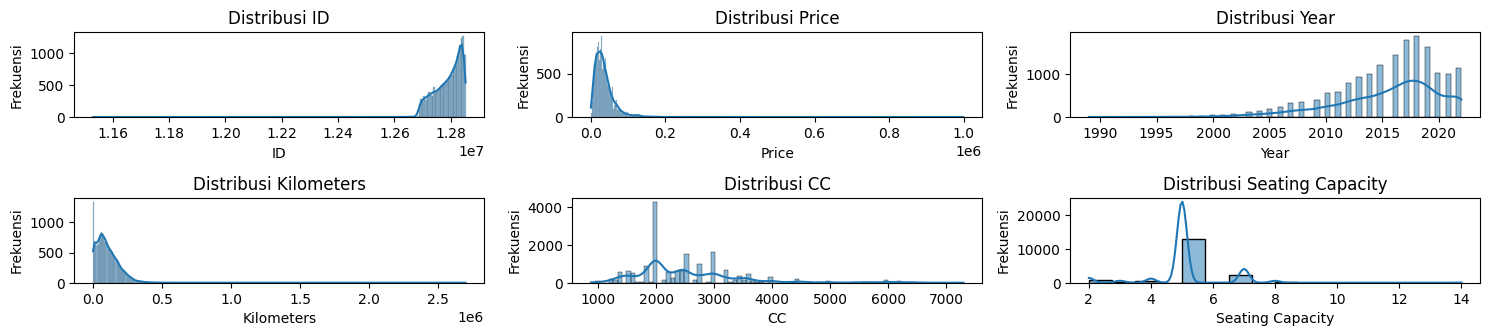

In [13]:
# Visualisasi Distribusi seluruh data numerik dengan cek skewness 
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}'),
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

- Harga: Sebagian besar kendaraan memiliki harga yang relatif rendah.
- Tahun: Jumlah kendaraan yang diproduksi meningkat dari tahun ke tahun.
- Jarak tempuh: Sebagian besar kendaraan memiliki jarak tempuh yang rendah.
- Kapasitas mesin: Ada beberapa kelas atau kategori kendaraan berdasarkan kapasitas mesin.
- Kapasitas tempat duduk: Sebagian besar kendaraan memiliki kapasitas tempat duduk yang sama.

## Nilai Skewness

In [14]:
skewness_values = df[num_col].skew()

# Menampilkan nilai skewness
print("Skewness of numerical columns:")
print(skewness_values)

Skewness of numerical columns:
ID                 -2.271612
Price               6.400061
Year               -1.006224
Kilometers          2.954724
CC                  1.576140
Seating Capacity    0.396758
dtype: float64


- `ID` (-2.271612): Nilai skewness negatif yang cukup besar menunjukkan bahwa distribusi ID cenderung condong ke kiri, dengan banyak nilai rendah dan sedikit nilai tinggi.

- `Price` (6.400061): Nilai skewness positif yang tinggi menandakan distribusi harga sangat condong ke kanan, menunjukkan banyak kendaraan dengan harga rendah dan beberapa kendaraan dengan harga sangat tinggi.

- `Year` (-1.006224): Nilai skewness negatif menunjukkan bahwa sebagian besar data tahun lebih baru, dengan beberapa entri tahun yang lebih tua, meskipun tidak terlalu ekstrem.

- `Kilometers` (2.954724): Nilai skewness positif menunjukkan distribusi jarak tempuh kendaraan cenderung condong ke kanan, dengan banyak kendaraan memiliki jarak tempuh rendah dan beberapa dengan jarak tempuh yang sangat tinggi.

- `CC` (1.576140): Nilai skewness positif menunjukkan bahwa distribusi kapasitas mesin cenderung condong ke kanan, artinya lebih banyak kendaraan dengan kapasitas mesin rendah dibandingkan yang tinggi.

- `Seating Capacity` (0.396758): Nilai skewness mendekati nol menunjukkan bahwa distribusi kapasitas tempat duduk relatif simetris, dengan sedikit kecenderungan ke kanan.

## Check Correlation

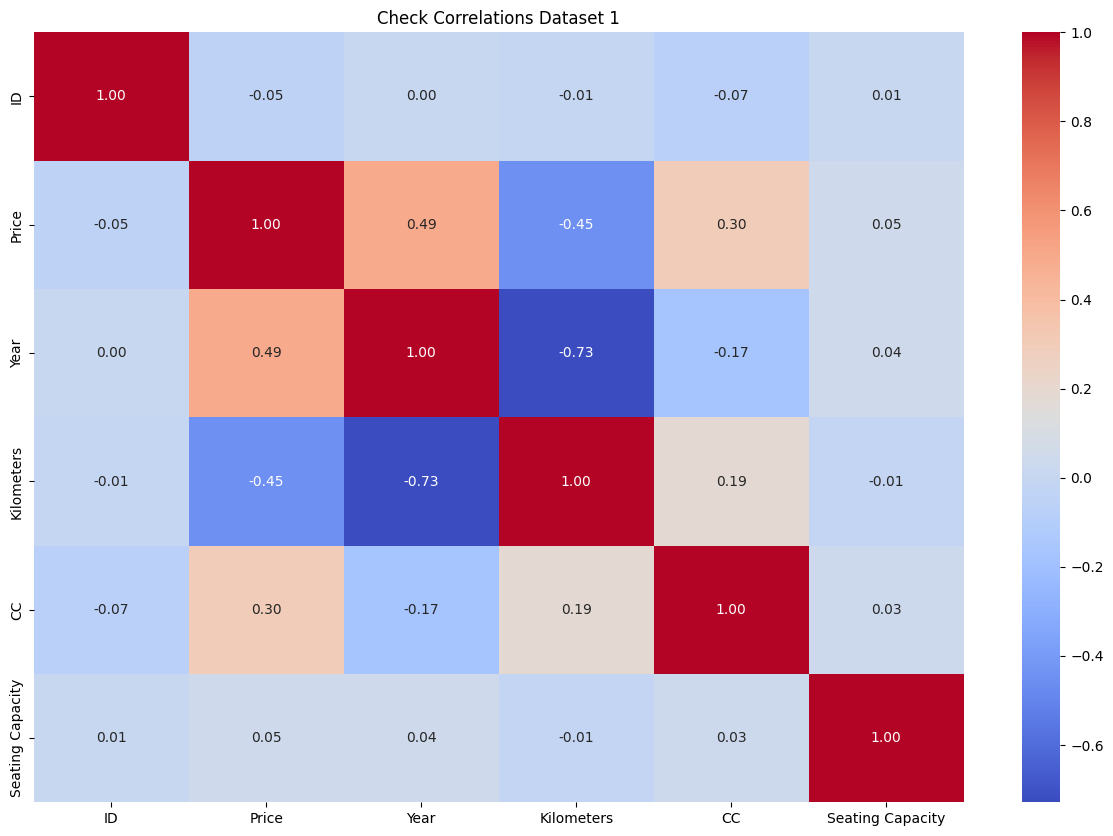

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_col].corr(), fmt=".2f", annot=True, cmap='coolwarm')
plt.title('Check Correlations Dataset 1')
plt.show()

- Harga dan Tahun: Terdapat korelasi positif yang kuat antara harga dan tahun. Ini berarti semakin baru tahun pembuatan kendaraan, cenderung semakin tinggi harganya. Ini masuk akal karena mobil yang lebih baru biasanya memiliki teknologi yang lebih canggih dan fitur yang lebih banyak.
- Harga dan CC: Ada korelasi positif yang cukup kuat antara harga dan kapasitas mesin (CC). Ini menunjukkan bahwa mobil dengan kapasitas mesin yang lebih besar cenderung lebih mahal.
- Kilometer dan Tahun: Ada korelasi negatif yang cukup kuat antara kilometer dan tahun. Ini berarti mobil yang lebih baru cenderung memiliki jarak tempuh yang lebih rendah. Ini juga masuk akal karena mobil baru belum banyak digunakan.
- Kilometer dan CC: Ada korelasi positif antara kilometer dan kapasitas mesin. Ini mungkin menunjukkan bahwa mobil dengan kapasitas mesin yang lebih besar cenderung digunakan untuk perjalanan jarak jauh.

### Korelasi antar fitur numerik

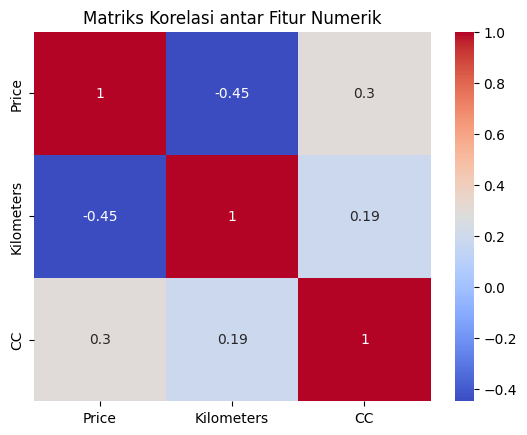

In [16]:
# Korelasi antar fitur numerik
correlation_matrix = df[['Price', 'Kilometers', 'CC']].corr()

# Visualisasi menggunakan heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi antar Fitur Numerik')
plt.show()

- Harga dan Kilometers: Terdapat korelasi negatif yang cukup kuat (-0.45). Ini artinya semakin tinggi jarak tempuh sebuah kendaraan, cenderung semakin rendah harganya. Ini masuk akal karena mobil bekas dengan jarak tempuh tinggi biasanya memiliki harga yang lebih rendah dibandingkan mobil baru atau mobil bekas dengan jarak tempuh rendah.
- Harga dan CC: Terdapat korelasi positif yang moderat (0.3). Ini berarti semakin besar kapasitas mesin sebuah kendaraan, cenderung semakin tinggi harganya. Ini juga masuk akal karena mobil dengan mesin yang lebih besar biasanya memiliki performa yang lebih baik dan fitur yang lebih lengkap, sehingga harganya pun lebih tinggi.
- Kilometers dan CC: Terdapat korelasi positif yang lemah (0.19). Ini menunjukkan sedikit kecenderungan bahwa mobil dengan jarak tempuh tinggi juga memiliki kapasitas mesin yang lebih besar. Namun, hubungan ini tidak sekuat hubungan antara harga dan variabel lainnya.

### Distribusi Harga Mobil

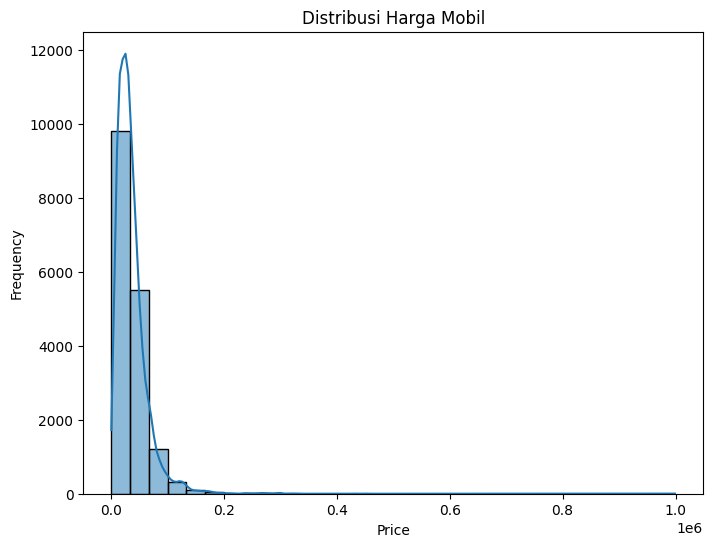

In [17]:
# Visualisasi distribusi harga mobil
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribusi Harga Mobil')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

> Harga mobil tidak terdistribusi secara merata. Sebagian besar mobil memiliki harga yang relatif rendah, tetapi ada beberapa mobil dengan harga yang sangat tinggi.
Ada beberapa faktor yang mempengaruhi harga mobil, seperti merek, model, tahun, kondisi, dan fitur tambahan.
Data harga mobil ini mungkin tidak mengikuti distribusi normal karena adanya ekor kanan yang panjang.

### Jumlah mobil berdasarkan jenis bahan bakar

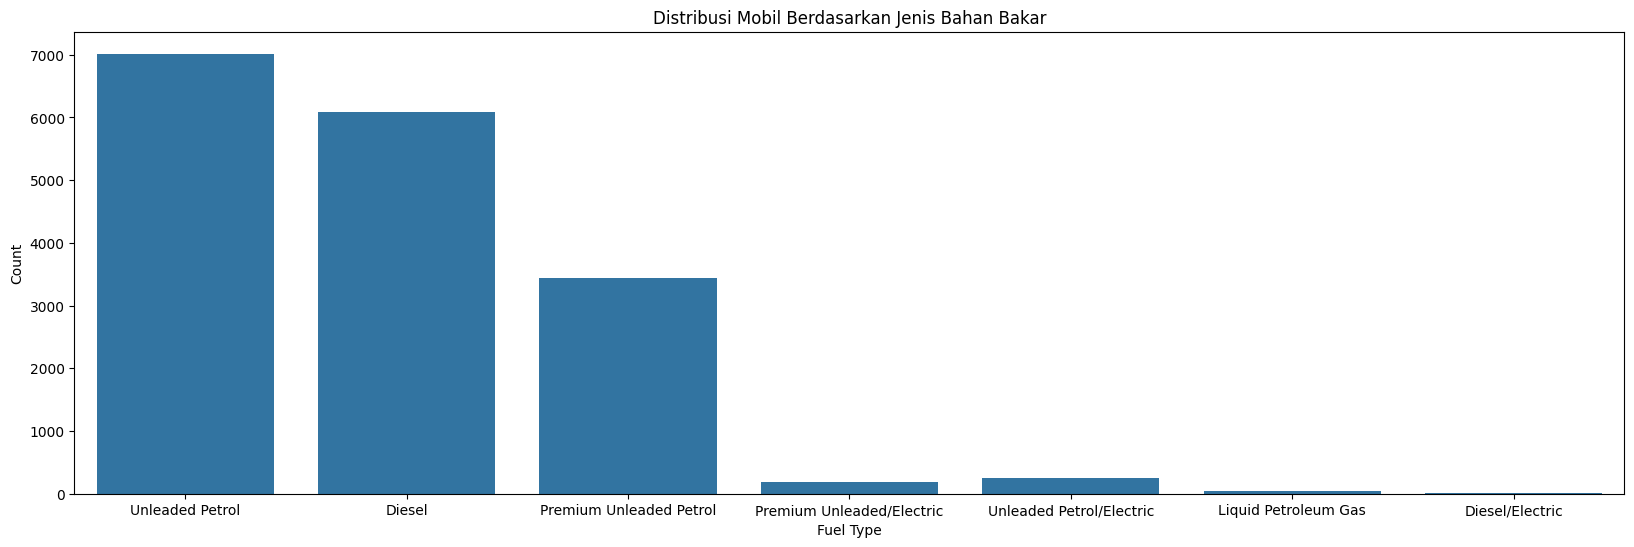

In [18]:
# Visualisasi jumlah mobil berdasarkan bahan bakar
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Fuel')
plt.title('Distribusi Mobil Berdasarkan Jenis Bahan Bakar')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

- Dominasi Bensin: Jenis bahan bakar yang paling banyak digunakan adalah Unleaded Petrol (bensin tanpa timbal). Ini menunjukkan bahwa mayoritas mobil dalam dataset ini menggunakan bensin sebagai bahan bakar utama.
- Diesel sebagai Pilihan Kedua: Jenis bahan bakar diesel juga cukup populer, menempati posisi kedua dalam hal jumlah mobil yang menggunakannya.
- Jenis Bahan Bakar Lain: Jenis bahan bakar lainnya seperti Premium Unleaded Petrol, Premium Unleaded/Electric, dan sebagainya, memiliki jumlah pengguna yang jauh lebih sedikit dibandingkan bensin dan diesel. Ini menunjukkan bahwa jenis bahan bakar ini masih menjadi pilihan minoritas di antara jenis mobil yang dianalisis.
- Tren Penggunaan Bahan Bakar Alternatif: Adanya kategori seperti Premium Unleaded/Electric dan Diesel/Electric menunjukkan adanya tren peralihan menuju kendaraan yang lebih ramah lingkungan dengan menggunakan kombinasi bahan bakar konvensional dan listrik. Namun, dari grafik ini terlihat bahwa penggunaan kendaraan listrik masih dalam skala yang relatif kecil dibandingkan dengan kendaraan berbahan bakar konvensional.

### Harga mobil berdarsarkan kapasitas mesin

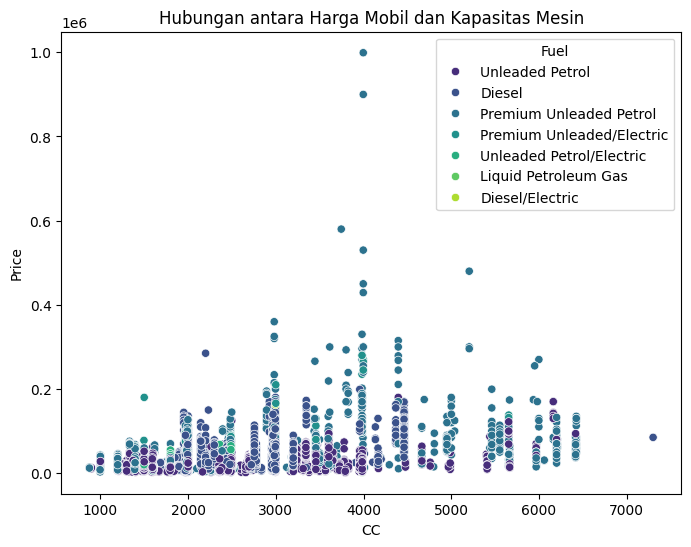

In [19]:
# Visualisasi hubungan antara harga mobil dan kapasitas mesin
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CC', y='Price', hue='Fuel', palette='viridis')
plt.title('Hubungan antara Harga Mobil dan Kapasitas Mesin')
plt.xlabel('CC')
plt.ylabel('Price')
plt.show()


- Korelasi Positif: Secara umum, dapat dilihat bahwa ada korelasi positif antara harga mobil dengan kapasitas mesin. Artinya, semakin besar kapasitas mesin sebuah mobil, cenderung semakin tinggi harganya. Ini masuk akal karena mobil dengan mesin yang lebih besar biasanya memiliki performa yang lebih baik, fitur yang lebih lengkap, dan teknologi yang lebih canggih.
- Pengaruh Jenis Bahan Bakar: Grafik juga menunjukkan bahwa jenis bahan bakar juga mempengaruhi harga mobil. Mobil dengan jenis bahan bakar tertentu cenderung berkumpul di area tertentu pada grafik. Misalnya, mobil dengan kapasitas mesin besar dan harga tinggi cenderung menggunakan jenis bahan bakar tertentu, seperti Premium Unleaded Petrol.
- Variasi Harga: Meskipun ada tren umum bahwa harga meningkat seiring dengan peningkatan kapasitas mesin, namun terdapat banyak variasi harga untuk setiap kapasitas mesin tertentu. Hal ini menunjukkan bahwa faktor lain selain kapasitas mesin juga mempengaruhi harga mobil, seperti merek, model, tahun pembuatan, kondisi, dan fitur tambahan.
- Outlier: Beberapa titik data terlihat jauh dari kelompok data lainnya. Titik-titik ini disebut outlier. Outlier bisa terjadi karena berbagai alasan, misalnya kesalahan dalam data, mobil dengan spesifikasi unik, atau kondisi pasar yang khusus.

### Jenis Mobil Terbanyak Berdasarkan Status (Baru atau Bekas)

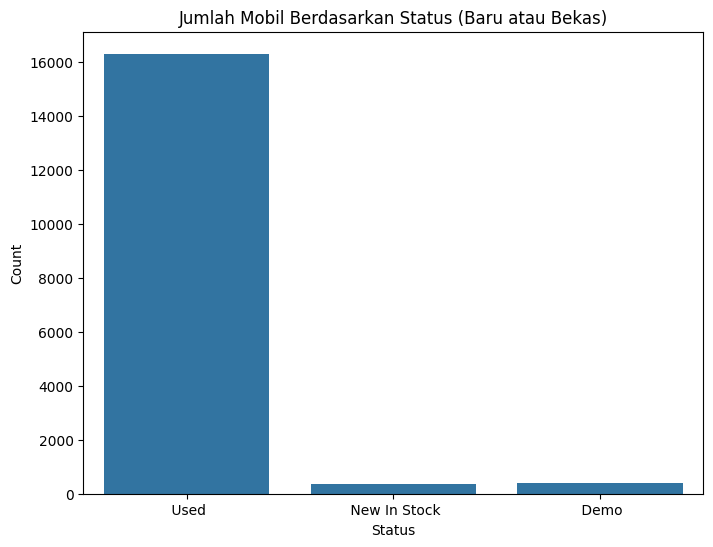

In [20]:
# Visualisasi jumlah mobil berdasarkan status (baru atau bekas)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status')
plt.title('Jumlah Mobil Berdasarkan Status (Baru atau Bekas)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


- Dominasi Mobil Bekas: Sebagian besar mobil dalam dataset ini berstatus bekas (Used). Hal ini menunjukkan bahwa dataset yang digunakan mungkin berasal dari platform penjualan mobil bekas atau data yang mencakup baik mobil baru maupun bekas.
- Jumlah Mobil Baru: Jumlah mobil baru dalam stok (New In Stock) jauh lebih sedikit dibandingkan dengan mobil bekas. Ini menunjukkan bahwa porsi mobil baru dalam dataset ini relatif kecil.
- Mobil Demo: Jumlah mobil demo sangat sedikit dibandingkan dengan mobil bekas dan baru. Ini menunjukkan bahwa mobil demo hanya merupakan sebagian kecil dari keseluruhan data.

# Feature Engineering

## Data Pre-Processing

### Split Data

In [21]:
# Drop 10 baris terakhir jika diperlukan
df = df.iloc[:-10]

# Set X dan y (X adalah fitur atau parameter, y adalah target yaitu 'Price')
X = df.drop(['Price'], axis=1) 
y = df['Price'] 

In [22]:
# Pisahkan data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### Split Train set dan Test set

In [23]:
# Verifikasi ukuran dataset train dan test
print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")

Train set size: (13630, 15), Test set size: (3408, 15)


In [24]:
cat_col = ['Name', 'Type', 'Gearbox', 'Fuel', 'Status', 'Color']
num_col = ['Kilometers', 'CC', 'Seating Capacity']
print(f'Kolom categorical di dataset: \n{cat_col}\n')
print(f'Kolom numerical di dataset: \n{num_col}')

Kolom categorical di dataset: 
['Name', 'Type', 'Gearbox', 'Fuel', 'Status', 'Color']

Kolom numerical di dataset: 
['Kilometers', 'CC', 'Seating Capacity']


In [25]:
skewness_values = X_train[num_col].skew()

# Menampilkan nilai skewness
print("Skewness of numerical columns:")
print(skewness_values)

Skewness of numerical columns:
Kilometers          3.329948
CC                  1.578271
Seating Capacity    0.390310
dtype: float64


## Check and Handling Outlier

In [26]:
# Split Skew yang normal dan high
skewness = X_train[num_col].skew()
highly_skewed_col = list(skewness[abs(skewness) > 1].index)
normal_skewed_col = list(skewness[abs(skewness) <= 1].index)

highly_skewed_col, normal_skewed_col

(['Kilometers', 'CC'], ['Seating Capacity'])

In [27]:
def calculate_boundaries_and_outliers(df, columns, threshold=3):
    """
    Fungsi ini dibuat untuk menghitung upper boundary, lower boundary, dan persentase outlier untuk kolom yang distribusi datanya normal
    """
    results = {
        'Lower Boundary': [],
        'Upper Boundary': [],
        'Outlier Percentage': []
    }

    for column in columns:
        if column in df.columns:
            # Hitung z-score
            z_scores = (df[column] - df[column].mean()) / df[column].std()
            
            # Hitung lower dan upper boundary
            lower_boundary = df[column].mean() - threshold * df[column].std()
            upper_boundary = df[column].mean() + threshold * df[column].std()
            
            # Hitung persentase outlier
            outliers = ((z_scores < -threshold) | (z_scores > threshold)).sum()
            outlier_percentage = (outliers / len(df[column])) * 100
            
            # Simpan hasil
            results['Lower Boundary'].append(lower_boundary)
            results['Upper Boundary'].append(upper_boundary)
            results['Outlier Percentage'].append(outlier_percentage)
        else:
            results['Lower Boundary'].append(None)
            results['Upper Boundary'].append(None)
            results['Outlier Percentage'].append(None)

    return pd.DataFrame(results, index=columns)

In [28]:
def calculate_iqr_boundaries_and_outliers(df, columns, multiplier=1.5):
    """
    Fungsi ini dibuat untuk menghitung upper boundary, lower boundary, dan persentase outlier
    menggunakan metode IQR (Interquartile Range) untuk kolom yang distribusi datanya tidak normal.
    """
    results = {
        'Lower Boundary': [],
        'Upper Boundary': [],
        'Outlier Percentage': []
    }

    for column in columns:
        if column in df.columns:
            # Hitung quartile 1 (Q1) dan quartile 3 (Q3)
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            
            # Hitung IQR
            IQR = Q3 - Q1
            
            # Hitung lower dan upper boundary
            lower_boundary = Q1 - multiplier * IQR
            upper_boundary = Q3 + multiplier * IQR
            
            # Hitung persentase outlier
            outliers = ((df[column] < lower_boundary) | (df[column] > upper_boundary)).sum()
            outlier_percentage = (outliers / len(df[column])) * 100
            
            # Simpan hasil
            results['Lower Boundary'].append(lower_boundary)
            results['Upper Boundary'].append(upper_boundary)
            results['Outlier Percentage'].append(outlier_percentage)
        else:
            # Jika kolom tidak ada, tambahkan None
            results['Lower Boundary'].append(None)
            results['Upper Boundary'].append(None)
            results['Outlier Percentage'].append(None)

    return pd.DataFrame(results, index=columns)

In [29]:
# menampilkan hasil perhitungan upper boundary, lower boundary dan persentase outlier dari masing-masing kolom
result = calculate_boundaries_and_outliers(X_train, normal_skewed_col, 3)
result

,Lower Boundary,Upper Boundary,Outlier Percentage
Seating Capacity,1.718251,8.486738,0.161409


- Lower Boundary (1.718251): Ini adalah batas bawah yang ditetapkan untuk menentukan outlier. Jika nilai kapasitas tempat duduk di bawah 1.718251, nilai tersebut dianggap sebagai outlier.

- Upper Boundary (8.486738): Ini adalah batas atas untuk menentukan outlier. Nilai kapasitas tempat duduk di atas 8.486738 dianggap sebagai outlier.

- Outlier Percentage (0.161409): Persentase ini menunjukkan proporsi entri yang teridentifikasi sebagai outlier dalam kolom Seating Capacity. Dalam hal ini, sekitar 16.14% dari total data memiliki nilai kapasitas tempat duduk yang berada di luar batas yang ditentukan.

In [30]:
# Handling Outliers Distribusi Normal
winsoriser_normal_skewed = Winsorizer(capping_method='gaussian',
                             tail='both',
                             fold=3,
                             variables=normal_skewed_col)

X_train = winsoriser_normal_skewed.fit_transform(X_train)
X_test= winsoriser_normal_skewed.transform(X_test)

In [31]:
# menampilkan hasil perhitungan upper boundary, lower boundary dan persentase outlier dari masing-masing kolom
result = calculate_iqr_boundaries_and_outliers(X_train, highly_skewed_col, 1.5)
result

,Lower Boundary,Upper Boundary,Outlier Percentage
Kilometers,-113547.125,306009.875,1.577403
CC,494.500,4474.500,3.008070


`Kilometers`
- Lower Boundary (-113547.125): Ini adalah batas bawah untuk mendeteksi outlier. Nilai jarak tempuh kendaraan di bawah -113547.125 dianggap sebagai outlier. Meskipun nilai negatif tidak realistis untuk jarak tempuh, batas ini menunjukkan bahwa tidak ada entri yang valid di bawah nilai ini dalam dataset.

- Upper Boundary (306009.875): Ini adalah batas atas untuk mendeteksi outlier. Nilai jarak tempuh di atas 306009.875 dianggap sebagai outlier.

- Outlier Percentage (1.577403): Sekitar 1.58% dari total data dalam kolom ini teridentifikasi sebagai outlier, menunjukkan bahwa hanya sedikit entri yang memiliki jarak tempuh yang tidak biasa.

`CC (Kapasitas Mesin)`
- Lower Boundary (494.500): Ini adalah batas bawah untuk mendeteksi outlier. Nilai kapasitas mesin di bawah 494.500 dianggap sebagai outlier.

- Upper Boundary (4474.500): Ini adalah batas atas untuk mendeteksi outlier. Nilai kapasitas mesin di atas 4474.500 dianggap sebagai outlier.

- Outlier Percentage (3.008070): Sekitar 3.01% dari total data dalam kolom ini teridentifikasi sebagai outlier, menunjukkan bahwa ada beberapa entri dengan kapasitas mesin yang tidak biasa.

In [32]:
# Handling Outliers Distribusi tidak Normal
winsoriser_high_skewed = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=highly_skewed_col)

X_train = winsoriser_high_skewed.fit_transform(X_train)
X_test = winsoriser_high_skewed.transform(X_test)

Hasil Setelah Setelah di Caping

In [33]:
# menampilkan hasil perhitungan upper boundary, lower boundary dan persentase outlier dari masing-masing kolom
result = calculate_boundaries_and_outliers(X_train, normal_skewed_col, 3)
result

,Lower Boundary,Upper Boundary,Outlier Percentage
Seating Capacity,1.824947,8.366059,0.161409


- Lower Boundary (1.824947): Ini adalah batas bawah yang ditetapkan setelah proses capping. Nilai kapasitas tempat duduk di bawah 1.824947 dianggap sebagai outlier. Proses capping bertujuan untuk membatasi nilai-nilai ekstrem sehingga lebih sesuai dengan rentang data yang wajar.

- Upper Boundary (8.366059): Ini adalah batas atas untuk mendeteksi outlier setelah capping. Nilai kapasitas tempat duduk di atas 8.366059 dianggap sebagai outlier.

- Outlier Percentage (0.161409): Persentase ini menunjukkan proporsi entri yang teridentifikasi sebagai outlier dalam kolom Seating Capacity setelah capping. Dalam hal ini, sekitar 16.14% dari total data masih memiliki nilai kapasitas tempat duduk yang berada di luar batas yang ditentukan.

In [34]:
# menampilkan hasil perhitungan upper boundary, lower boundary dan persentase outlier dari masing-masing kolom
result = calculate_iqr_boundaries_and_outliers(X_train, highly_skewed_col, 1.5)
result

,Lower Boundary,Upper Boundary,Outlier Percentage
Kilometers,-113547.125,306009.875,0.0
CC,494.500,4474.500,0.0


`Kilometers`
- Lower Boundary (-113547.125): Batas bawah yang ditetapkan untuk mendeteksi outlier. Dalam konteks ini, semua nilai jarak tempuh yang berada di bawah -113547.125 telah dianggap valid, dan tidak ada entri negatif yang relevan karena jarak tempuh tidak mungkin negatif.

- Upper Boundary (306009.875): Batas atas yang ditetapkan. Semua nilai jarak tempuh yang melebihi 306009.875 telah dibatasi (capped) sehingga tidak ada lagi entri yang teridentifikasi sebagai outlier.

- Outlier Percentage (0.0): Setelah proses capping, tidak ada entri yang teridentifikasi sebagai outlier dalam kolom ini, yang menunjukkan bahwa semua nilai jarak tempuh kini berada dalam rentang yang dapat diterima.

`CC (Kapasitas Mesin)`
- Lower Boundary (494.500): Batas bawah untuk mendeteksi outlier. Semua nilai kapasitas mesin di bawah 494.500 telah dianggap valid dan tidak ada entri di bawah nilai ini.

- Upper Boundary (4474.500): Batas atas yang ditetapkan. Nilai kapasitas mesin yang sebelumnya di atas 4474.500 telah dibatasi, sehingga tidak ada lagi entri yang teridentifikasi sebagai outlier.

- Outlier Percentage (0.0): Setelah proses capping, tidak ada entri yang teridentifikasi sebagai outlier dalam kolom ini juga, menunjukkan bahwa semua nilai kapasitas mesin kini berada dalam rentang yang dapat diterima.

## Cek Korelasi Fitur dan Target

In [35]:
cat_col = ['Name', 'Type', 'Gearbox', 'Fuel', 'Status', 'Color']
num_col = ['Kilometers', 'CC', 'Seating Capacity']

In [36]:
for i in num_col:
    corr = X_train[i].astype('category').cat.codes

    # melakukan uji korelasi kendall untuk mendapatkan hasil nilai korelasi dan p-value
    tau, p_value = kendalltau(y_train, corr)

    # menampilkan hasil nilai korelasi dan p-value
    print(f"Hasil uji korelasi Kendall kolom {i} dengan kolom Price:")
    print(f"Kendall's tau: {tau}")
    print(f"P-value: {p_value}\n")

Hasil uji korelasi Kendall kolom Kilometers dengan kolom Price:
Kendall's tau: -0.4588726311528162
P-value: 0.0

Hasil uji korelasi Kendall kolom CC dengan kolom Price:
Kendall's tau: 0.16963309864950732
P-value: 8.755112621319358e-190

Hasil uji korelasi Kendall kolom Seating Capacity dengan kolom Price:
Kendall's tau: 0.07270710082169982
P-value: 2.844862610975454e-27



## Feature Selection

In [37]:
# Menghapus kolom yang tidak diperlukan
X_train.drop(columns=['ID', 'Brand', 'Model', 'Variant', 'Series', 'Year'], inplace=True)
X_test.drop(columns=['ID', 'Brand', 'Model', 'Variant', 'Series', 'Year'], inplace=True)

In [38]:
y_train

10621    38888
2142     29500
13457    45288
5967     66990
16967    28950
         ...  
4829     26000
10201    24990
9372     43999
7291     48990
7293     15990
Name: Price, Length: 13630, dtype: int64

In [39]:
for i in cat_col:
    corr = X_train[i].astype('category').cat.codes

    # melakukan uji korelasi kendall untuk mendapatkan hasil nilai korelasi dan p-value
    tau, p_value = pearsonr(y_train, corr)

    # menampilkan hasil nilai korelasi dan p-value
    print(f"Hasil uji korelasi pearson kolom {i} dengan kolom Price:")
    print(f"pearson: {tau}")
    print(f"P-value: {p_value}\n")

Hasil uji korelasi pearson kolom Name dengan kolom Price:
pearson: 0.5094130067527461
P-value: 0.0

Hasil uji korelasi pearson kolom Type dengan kolom Price:
pearson: -0.02271613943181298
P-value: 0.007998016666004755

Hasil uji korelasi pearson kolom Gearbox dengan kolom Price:
pearson: -0.1045119632368796
P-value: 2.0482308795079214e-34

Hasil uji korelasi pearson kolom Fuel dengan kolom Price:
pearson: -0.23820505125347505
P-value: 3.8954212785567e-175

Hasil uji korelasi pearson kolom Status dengan kolom Price:
pearson: -0.18174132650240235
P-value: 1.5093692010440708e-101

Hasil uji korelasi pearson kolom Color dengan kolom Price:
pearson: -0.058146293676523506
P-value: 1.0939585733338682e-11



## Pipeline Processing

In [40]:
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

In [41]:
# memisahkan kolom berdasarkan tipe data categorical atau numerical
cat_col = ['Name', 'Type', 'Gearbox', 'Fuel', 'Status', 'Color']
num_col = ['Kilometers', 'CC', 'Seating Capacity']

preproc_pipeline= ColumnTransformer([
        ('num_col', num_pipeline, num_col),
        ('cat_col',cat_pipeline, cat_col)
    ],
    remainder='passthrough',
    verbose=True)

In [42]:
preproc_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_col',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Kilometers', 'CC', 'Seating Capacity']),
                                ('cat_col',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Name', 'Type', 'Gearbox', 'Fuel', 'Status',
                                  'Color'])],
                  verbose=True)

In [43]:
X_train

,Name,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
10621,2022 Renault Arkana ZEN XJL MY22,2189.0,Coupe,Automatic,Unleaded Petrol,New In Stock,1333.0,White,5.0
2142,2017 Honda Civic VTI-LX MY17,63300.0,Hatchback,Automatic,Unleaded Petrol,Used,1498.0,Silver,5.0
13457,2022 Mazda CX-5 Maxx Sport (awd) CX5L,6.0,Wagon,Automatic,Unleaded Petrol,New In Stock,2488.0,White,5.0
5967,2022 Mazda CX-9 GT (awd) CX9M,3281.0,Wagon,Automatic,Unleaded Petrol,Used,2488.0,Grey,7.0
16967,2014 Holden Colorado 7 LTZ (4X4) RG MY14,131526.0,Wagon,Automatic,Diesel,Used,2776.0,Silver,7.0
...,...,...,...,...,...,...,...,...,...
4829,2014 Holden Colorado LT (4X4) RG MY14,181000.0,Crew Cab Pickup,Manual,Diesel,Used,2776.0,White,5.0
10201,2016 Toyota RAV4 GX (2WD) ZSA42R MY16,141940.0,Wagon,Automatic,Unleaded Petrol,Used,1987.0,Blue,5.0
9372,2019 BMW 530D M-Sport G30 MY18,142362.0,Sedan,Automatic,Diesel,Used,2993.0,Grey,5.0
7291,2018 Volvo XC40 T5 Momentum Launch EDT (awd) 5...,52933.0,Wagon,Automatic,Premium Unleaded Petrol,Used,1969.0,White,5.0


In [44]:
X_train_prep = preproc_pipeline.fit_transform(X_train)
X_test_prep = preproc_pipeline.transform(X_test)

[ColumnTransformer] ....... (1 of 2) Processing num_col, total=   0.0s
[ColumnTransformer] ....... (2 of 2) Processing cat_col, total=   0.1s


# Model Definition

## K-Nearest Neighbors

> K Nearest Neighbor (KNN) adalah algoritma yang digunakan untuk klasifikasi berdasarkan kedekatan data. Ketika ada data baru yang ingin diklasifikasikan, KNN akan melihat K tetangga terdekat dari data tersebut. Kelas dari data baru ditentukan berdasarkan suara mayoritas dari tetangga terdekat ini. Ini membuat KNN cukup intuitif dan mudah diimplementasikan.

### Cross Validation KNN

> Cross-validation KNN adalah metode untuk mengevaluasi model KNN. Dengan cara ini, kita membagi data menjadi beberapa bagian (folds). Model dilatih pada sebagian data dan diuji pada bagian yang tersisa. Proses ini diulang hingga semua bagian telah digunakan sebagai data uji. Dengan melakukan ini, kita bisa mendapatkan gambaran yang lebih baik tentang kinerja model di berbagai set data.

## Support Vector Machine (SVM)

> Support Vector Machine (SVM) adalah algoritma yang digunakan untuk klasifikasi dengan cara mencari garis pemisah terbaik antara dua kelas. SVM berusaha memaksimalkan jarak (margin) antara kelas yang berbeda untuk menghasilkan model yang lebih akurat. Pendekatan ini membuat SVM sangat efektif untuk berbagai jenis data.

### Cross Validation SVM

> Cross-validation SVM berfungsi untuk menguji kinerja model SVM dengan cara yang sama seperti KNN. Dataset dibagi menjadi beberapa fold, di mana model dilatih dan diuji pada berbagai bagian. Metode ini membantu kita memastikan bahwa model tidak hanya baik pada satu set data tetapi juga dapat diandalkan pada data lain.

## Decision Tree

> Decision Tree adalah algoritma yang membagi data menjadi subset berdasarkan fitur yang berbeda. Model ini membentuk struktur pohon yang mencerminkan keputusan yang diambil berdasarkan nilai-nilai fitur. Decision Tree mudah dipahami dan dapat memberikan hasil yang jelas, sehingga sering digunakan dalam berbagai aplikasi.

### Cross Validation Decision Tree

> Cross-validation Decision Tree adalah proses evaluasi model dengan membagi dataset menjadi beberapa fold. Model dilatih pada beberapa subset dan diuji pada subset lainnya. Dengan metode ini, kita dapat mengevaluasi kinerja pohon keputusan dan memastikan bahwa model tidak mengalami overfitting.

## Random Forest

> Random Forest adalah metode ensemble yang menggabungkan banyak Decision Tree untuk meningkatkan akurasi prediksi. Setiap tree dibangun menggunakan subset acak dari data. Hasil akhir ditentukan dengan cara voting dari semua tree yang ada, sehingga model ini lebih stabil dan dapat diandalkan.

### Cross Validation Random Forest

> Cross-validation Random Forest dilakukan dengan membagi dataset menjadi beberapa bagian dan melatih model pada berbagai subset. Ini memungkinkan kita untuk menilai kinerja model secara keseluruhan dan memastikan bahwa Random Forest kita dapat beradaptasi dengan baik pada data baru.

## XGBoost

> XGBoost (Extreme Gradient Boosting) adalah algoritma yang dirancang untuk meningkatkan kinerja model dengan cara mengoptimalkan proses pembelajaran. XGBoost membangun model secara bertahap dengan menambahkan weak learners (biasanya decision trees) yang memperbaiki kesalahan model sebelumnya. Ini menjadikannya salah satu algoritma yang sangat efisien.

### Cross Validation XGBoost

> Cross-validation XGBoost mirip dengan cross-validation pada model lain. Dataset dibagi menjadi beberapa fold, dan model XGBoost dilatih dan diuji pada bagian-bagian tersebut. Metode ini memastikan bahwa model kita memiliki performa yang konsisten di berbagai set data dan tidak hanya cocok untuk data tertentu.

# Model Training

## K-Nearest Neighbors

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_prep, y_train)

KNeighborsClassifier()

In [46]:
y_pred_train_knn = knn.predict(X_train_prep)
y_pred_test_knn = knn.predict(X_test_prep)

In [47]:
# Hitung MAE untuk data pelatihan
mae_train_knn = mean_absolute_error(y_train, y_pred_train_knn)
mae_test_knn = mean_absolute_error(y_test, y_pred_test_knn)

# Hitung MAE untuk data pengujian
print(f'MAE untuk data pelatihan: {mae_train_knn:.3f}')
print(f'MAE untuk data pengujian: {mae_test_knn:.3f}')

MAE untuk data pelatihan: 9645.048
MAE untuk data pengujian: 10877.038


### Cross Validation KNN

In [48]:
mae_scores_knn = cross_val_score(knn, X_train_prep, y_train, cv=5, scoring='neg_mean_absolute_error')


c:\Users\User\miniconda3\envs\Abimanyu_env\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [49]:
print("MAE Scores KNN:", mae_scores_knn)
print("Rata-rata MAE KNN:", mae_scores_knn.mean())

MAE Scores KNN: [-12759.68231842 -12476.69845928 -11872.34996332 -12071.29236977
 -11246.50807043]
Rata-rata MAE KNN: -12085.30623624358


## Support Vector Regressor (SVR)

In [50]:
svm = SVR()
svm.fit(X_train_prep, y_train)

SVR()

In [51]:
y_pred_train_SVR = svm.predict(X_train_prep)
y_pred_test_SVR = svm.predict(X_test_prep)

In [52]:
# Hitung MAE untuk data pelatihan
mae_train_svm = mean_absolute_error(y_train, y_pred_train_SVR)
mae_test_svm = mean_absolute_error(y_test, y_pred_test_SVR)

# Hitung MAE untuk data pengujian
print(f'MAE untuk data pelatihan: {mae_train_svm:.3f}')
print(f'MAE untuk data pengujian: {mae_test_svm:.3f}')

MAE untuk data pelatihan: 18348.555
MAE untuk data pengujian: 17497.309


### Cross Validation SVR

In [53]:
mae_scores_svr = cross_val_score(svm, X_train_prep, y_train, cv=5, scoring='neg_mean_absolute_error')

In [54]:
print("MAE Scores SVR:", mae_scores_svr)
print("Rata-rata MAE SVR:", mae_scores_svr.mean())

MAE Scores SVR: [-17811.46961369 -18211.74174853 -18950.54457707 -19137.2910102
 -17765.96755878]
Rata-rata MAE SVR: -18375.40290165251


## Decision Tree

In [55]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_prep, y_train)

DecisionTreeRegressor()

In [56]:
y_pred_train_dt = dt_reg.predict(X_train_prep)
y_pred_test_dt = dt_reg.predict(X_test_prep)

In [57]:
# Hitung MAE untuk data pelatihan
mae_train_dt = mean_absolute_error(y_train, y_pred_train_dt)
mae_test_dt = mean_absolute_error(y_test, y_pred_test_dt)

# Hitung MAE untuk data pengujian
print(f'MAE untuk data pelatihan: {mae_train_dt:.3f}')
print(f'MAE untuk data pengujian: {mae_test_dt:.3f}')

MAE untuk data pelatihan: 3.026
MAE untuk data pengujian: 7648.170


### Cross Validation Decision Tree

In [58]:
mae_scores_dt = cross_val_score(dt_reg, X_train_prep, y_train, cv=5, scoring='neg_mean_absolute_error')

In [59]:
print("MAE Scores Decision Tree:", mae_scores_dt)
print("Rata-rata MAE Decision Tree:", mae_scores_dt.mean())

MAE Scores Decision Tree: [-7873.83088775 -7665.69754219 -7739.36665444 -8125.83895818
 -7679.94497432]
Rata-rata MAE Decision Tree: -7816.935803374909


## Random Forest

In [60]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_prep, y_train)

RandomForestRegressor()

In [61]:
y_pred_train_rf = rf_reg.predict(X_train_prep)
y_pred_test_rf = rf_reg.predict(X_test_prep)

In [62]:
# Hitung MAE untuk data pelatihan
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)

# Hitung MAE untuk data pengujian
print(f'MAE untuk data pelatihan: {mae_train_rf:.3f}')
print(f'MAE untuk data pengujian: {mae_test_rf:.3f}')

MAE untuk data pelatihan: 2398.068
MAE untuk data pengujian: 6233.525


### Cross Validation Random Forest

In [63]:
mae_scores_rf = cross_val_score(rf_reg, X_train_prep, y_train, cv=5, scoring='neg_mean_absolute_error')

In [64]:
print("MAE Scores Random Forest:", mae_scores_rf)
print("Rata-rata Random Forest:", mae_scores_rf.mean())

MAE Scores Random Forest: [-6838.67756057 -6558.04356547 -6878.73034753 -6725.86849866
 -6496.67351364]
Rata-rata Random Forest: -6699.598697175347


## XGBoost

In [65]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_prep, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
y_pred_train_xgb = xgb_reg.predict(X_train_prep)
y_pred_test_xgb = xgb_reg.predict(X_test_prep)

In [67]:
# Hitung MAE untuk data pelatihan
mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)

# Hitung MAE untuk data pengujian
print(f'MAE untuk data pelatihan: {mae_train_xgb:.3f}')
print(f'MAE untuk data pengujian: {mae_test_xgb:.3f}')

MAE untuk data pelatihan: 6812.117
MAE untuk data pengujian: 7519.939


### Cross Validation XGBoost

In [68]:
mae_scores_xgb = cross_val_score(xgb_reg, X_train_prep, y_train, cv=5, scoring='neg_mean_absolute_error')

In [69]:
print("MAE Scores XGB:", mae_scores_xgb)
print("Rata-rata XGB:", mae_scores_xgb.mean())

MAE Scores XGB: [-8000.53925022 -7630.82665568 -7815.47120977 -7931.4692947
 -7515.68597361]
Rata-rata XGB: -7778.798476794461


# Model Evaluation

In [70]:
# Contoh Model
models = {
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": xgb.XGBRegressor()
}

# Dictionary untuk menyimpan hasil
results = {
    "Model": [],
    "MAE Scores": [],
    "Rata-rata MAE": []
}

# Looping untuk menghitung MAE untuk setiap model
for model_name, model in models.items():
    mae_scores = cross_val_score(model, X_train_prep, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_scores = -mae_scores  # Ubah menjadi positif
    
    # Simpan hasil ke dalam dictionary
    results["Model"].append(model_name)
    results["MAE Scores"].append(mae_scores)
    results["Rata-rata MAE"].append(mae_scores.mean())

# Buat DataFrame dari hasil
results_df = pd.DataFrame(results)

In [71]:
results_df

,Model,MAE Scores,Rata-rata MAE
0,KNN,"[8497.729860601614, 8283.289068231841, 8490.66...",8477.329288
1,SVR,"[17811.469613685927, 18211.741748531695, 18950...",18375.402902
2,Decision Tree,"[7882.599779897286, 7770.862986060161, 7787.43...",7866.526853
3,Random Forest,"[6811.23836418265, 6539.3764009275765, 6793.70...",6674.296359
4,XGBoost,"[8000.53925021781, 7630.826655678249, 7815.471...",7778.798477


dari hasil model training, nilai terbaik yaitu menggunakan model random forest

# Hyperparameter Tuning

In [72]:
# Parameter grid untuk GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],     
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4]          
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf_reg,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1,
                           verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_prep, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [73]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [74]:
rf_best=grid_search.best_estimator_

In [75]:
y_pred_hyper_train=rf_best.predict(X_train_prep)
y_pred_hyper_test=rf_best.predict(X_test_prep)

In [76]:
# Hitung MAE untuk data pelatihan
mae_train_hyper = mean_absolute_error(y_train, y_pred_hyper_train)
mae_test_hyper = mean_absolute_error(y_test, y_pred_hyper_test)

# Hitung MAE untuk data pengujian
print(f'MAE untuk train: {mae_train_hyper:.3f}')
print(f'MAE untuk test: {mae_test_hyper:.3f}')

MAE untuk train: 2675.854
MAE untuk test: 7073.172


## Analisis Hasil

`Perbandingan MAE`:

MAE yang lebih rendah pada data latih (2650.371) menunjukkan bahwa model mampu mempelajari pola dalam data latih dengan baik. Ini menunjukkan bahwa model telah cukup fit terhadap data yang digunakan untuk melatihnya.
Namun, MAE yang jauh lebih tinggi pada data uji (7007.783) menunjukkan bahwa model tidak dapat menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya. Ini mengindikasikan adanya kesenjangan antara kinerja model pada data latih dan data uji.

`Overfitting`:

> Berdasarkan perbedaan signifikan antara MAE data latih dan MAE data uji, dapat disimpulkan bahwa model mengalami overfitting.
Overfitting terjadi ketika model belajar terlalu banyak detail dan noise dari data latih, sehingga kinerjanya menurun ketika dihadapkan pada data baru (data uji). Model tersebut mungkin telah menyesuaikan terlalu banyak dengan karakteristik spesifik dari data latih, tanpa memahami pola yang lebih umum yang berlaku untuk data secara keseluruhan.

# Model Saving

In [79]:
with open('model.pkl','wb')as file_1:
    pickle.dump(rf_best,file_1)

with open('pipeline_pkl','wb')as file_2:
    pickle.dump(preproc_pipeline, file_2)


`Keunggulan Random Forest`:
> Kinerja Baik: Random Forest biasanya bekerja sangat baik, terutama ketika data yang digunakan kompleks atau memiliki banyak variabel. Model ini lebih akurat dibandingkan beberapa model lain karena menggunakan banyak decision tree.

> Tidak Mudah Overfitting: Dibandingkan dengan satu decision tree, Random Forest lebih sulit untuk overfitting karena setiap tree hanya melihat sebagian dari data. Ini membuat prediksinya lebih stabil.

> Bisa Digunakan di Banyak Kasus: Random Forest cocok digunakan untuk berbagai jenis prediksi, baik regresi maupun klasifikasi.

> Mampu Menangani Banyak Variabel: Random Forest bekerja baik dengan dataset yang memiliki banyak fitur atau variabel.

`Kelemahan Random Forest`:
> Overfitting pada Data Latih: Walaupun lebih tahan terhadap overfitting, model ini tetap bisa overfitting jika datanya memiliki banyak noise, seperti yang terlihat pada perbedaan besar antara MAE data latih dan data uji di hasil kamu.

> Memakan Banyak Waktu dan Memori: Karena menggunakan banyak decision tree, model ini bisa lambat dan butuh memori yang besar, apalagi jika datanya besar.

> Sulit untuk Dimengerti: Jika ingin memahami bagaimana model ini membuat keputusan, Random Forest agak sulit dipahami karena prosesnya kompleks dan menggabungkan banyak tree.

> Kurang Bagus untuk Ekstrapolasi: Random Forest tidak bagus untuk memprediksi nilai yang berada di luar rentang data yang dilatih.

> Tidak Cocok untuk Data yang Tidak Seimbang: Jika data memiliki perbedaan besar antara jumlah kelas, Random Forest bisa bias ke kelas yang jumlahnya lebih besar.

# Pengambilan Kesimpulan

> Random Forest memberikan hasil yang baik, namun dari analisis yang kamu lakukan, terlihat bahwa model ini mengalami overfitting pada data latih. Untuk meningkatkan hasilnya, perlu dilakukan penyesuaian lebih lanjut seperti tuning hyperparameter atau menggunakan cross-validation agar hasil pada data uji lebih baik.
> Berdasarkan analisis data kendaraan dan hasil pelatihan model prediksi, model Random Forest menunjukkan kinerja terbaik dalam hal akurasi, Model ini mengungguli metode lainnya seperti KNN, SVR, Decision Tree, dan XGBoost. Dengan kinerja yang lebih baik ini, Random Forest adalah pilihan ideal untuk digunakan dalam analisis dan prediksi yang berhubungan dengan data kendaraan.

# Rekomendasi

> Implementasikan model Random Forest untuk membantu menentukan harga kendaraan yang lebih akurat berdasarkan fitur seperti tahun, jarak tempuh, tipe, dan kondisi. Hal ini dapat meningkatkan daya tarik penawaran dan meminimalkan risiko kerugian akibat penetapan harga yang tidak tepat.
Analisis Segmentasi Pasar:

> Gunakan model untuk menganalisis preferensi pelanggan berdasarkan data historis penjualan. Hal ini dapat membantu dalam segmentasi pasar yang lebih baik dan penyesuaian strategi pemasaran untuk menarik segmen pelanggan tertentu.
Strategi Pemasaran yang Diperkuat:

> Dengan data analisis yang mendalam dari model Random Forest, perusahaan dapat mengembangkan kampanye pemasaran yang lebih terfokus dan efektif, berdasarkan pada preferensi pelanggan yang teridentifikasi.
Pengembangan Layanan Pelanggan:

> Tawarkan layanan yang disesuaikan berdasarkan wawasan yang diperoleh dari model, seperti rekomendasi kendaraan untuk pelanggan berdasarkan riwayat pencarian dan pembelian mereka.
Monitoring Kinerja dan Penyesuaian Berkala:

> Secara berkala evaluasi kinerja model dan lakukan penyesuaian untuk memastikan akurasi tetap terjaga seiring dengan perubahan tren pasar dan preferensi pelanggan. Pembaruan data dan model akan membantu perusahaan tetap kompetitif.
Pelatihan Tim Internal:

> Berikan pelatihan kepada tim penjualan dan pemasaran tentang cara memanfaatkan hasil analisis model untuk mendukung pengambilan keputusan yang lebih baik, meningkatkan efisiensi, dan responsif terhadap kebutuhan pelanggan.